In [1]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets
from sklearn.model_selection import train_test_split
cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy of training set: ", format(tree.score(X_train, y_train)))
print("Accuracy of testing set: ", format(tree.score(X_test, y_test)))

'''The accuracy on the training data is 100% cuz the 'leaves are pure and the tree has grown
deep enough to prefectly memorize all the labels in the data set. While the result of the test
set is worse than that of training set'''

Accuracy of training set:  1.0
Accuracy of testing set:  0.9370629370629371


"The accuracy on the training data is 100% cuz the 'leaves are pure and the tree has grown\ndeep enough to prefectly memorize all the labels in the data set. While the result of the test\nset is worse than that of training set"

In [2]:
'''Now lets pre prun the tree by deciding the max depth and generalizing the model as well as
decrease overfitting'''
tree2= DecisionTreeClassifier(max_depth=4,random_state=0)
tree2.fit(X_train, y_train)
print("Accuracy of training set: ", format(tree2.score(X_train, y_train)))
print("Accuracy of testing set: ", format(tree2.score(X_test, y_test)))

Accuracy of training set:  0.9882629107981221
Accuracy of testing set:  0.951048951048951


In [3]:
'''We can visualize the tree by using 'export_graphviz' function which writes a file the
.dot format(a text format) for storing graphs'''
from sklearn.tree import export_graphviz
export_graphviz(tree2, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

In [4]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [5]:
print("Feature importance : ", format(tree2.feature_importances_))

Feature importance :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


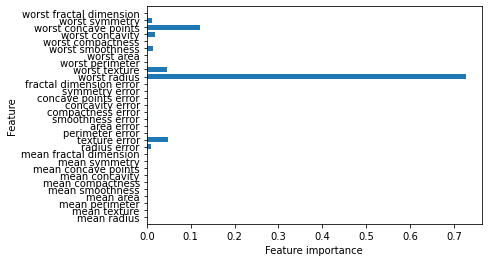

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree2)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

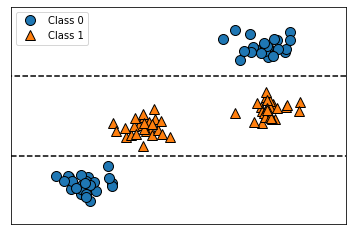

In [12]:
import mglearn
tree1 = mglearn.plots.plot_tree_not_monotone()
display(tree1)